# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os

# Import Dataframes

In [2]:
#path=path to project folder
path= r'/Users/alexmendrin/Documents/Career Foundry/Data Immersion/Achievement 4/InstaCart Basket Analysis'

### Original Dataframes

In [3]:
#df_ords_og= original orders file
df_ords_og= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'))

In [5]:
#df_prods_og= original products file
df_prods_og= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'))

In [8]:
#df_products_prior_og= original file
df_products_prior_og= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'order_products__prior.csv'))

### After Consistency Checks

In [12]:
#df_ords= after checks
df_ords= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_checked.csv'))

In [13]:
#df_prods= after checks
df_prods= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'products_checked.csv'))

### Merged Dataframes

In [15]:
#orders + orders_products_prior
df_orders_combined= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_combined.pkl'))

In [16]:
#order_combined + products
df_orders_products_combined= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_combined.pkl'))

# Check Dataframe Shapes

In [9]:
df_ords_og.shape

(3421083, 7)

In [10]:
df_prods_og.shape

(49693, 5)

In [11]:
df_products_prior_og.shape

(32434489, 4)

In [17]:
df_orders_combined.shape

(32434489, 11)

In [18]:
df_orders_products_combined.shape

(32404859, 15)

# Final Dataframe count

In [3]:
#import final datafram
final_instacart_data=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_instacart_data.pkl'))

In [4]:
final_instacart_data.shape

(30964564, 44)

In [4]:
final_instacart_data.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,economic_group,department,alcohol_status,baby_status,pet_status,vegetarian_status,parental_relationship_status,organic_profile,relationship_age_status,organic_product
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Lower Class,beverages,0,0,0,1,Nuclear Family,NaN,Married Adult,NaN
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Lower Class,beverages,0,0,0,1,Nuclear Family,NaN,Married Adult,NaN
2,473747,1,3,3,12,21.0,False,196,1,1,...,Lower Class,beverages,0,0,0,1,Nuclear Family,NaN,Married Adult,NaN
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Lower Class,beverages,0,0,0,1,Nuclear Family,NaN,Married Adult,NaN
4,431534,1,5,4,15,28.0,False,196,1,1,...,Lower Class,beverages,0,0,0,1,Nuclear Family,NaN,Married Adult,NaN


# Key Question Visualizations

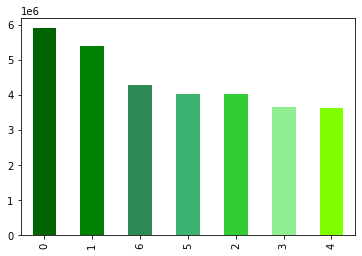

In [14]:
#Key Question 1
busiest_days_bar=final_instacart_data['orders_day_of_the_week'].value_counts().plot.bar(color=['darkgreen', 'green', 'seagreen','mediumseagreen', 'limegreen', 'lightgreen', 'chartreuse'])

In [10]:
#export bar chart
busiest_days_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_busiest_days.png'))

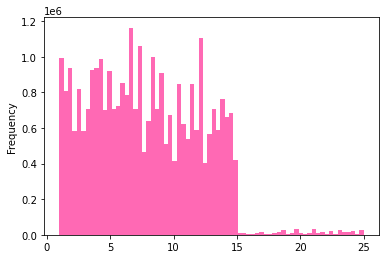

In [18]:
#histogram of price frequency
hist_prices2=final_instacart_data['prices'].plot.hist(bins = 70, color='hotpink')

In [19]:
#export histogram
hist_prices2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_2.png'))

In [23]:
#aggregate customer loyalty expenditures
final_instacart_data.groupby('loyalty_flag').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773575  1.0  25.0
New customer      7.801665  1.0  25.0
Regular customer  7.798262  1.0  25.0

In [24]:
#aggregate customer loyalty order frequencies
final_instacart_data.groupby('loyalty_flag').agg({'median_order_frequency' : ['mean', 'min', 'max']})

median_order_frequency           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 5.170559  0.0  14.0
New customer                  18.037059  0.0  30.0
Regular customer              10.612951  0.0  30.0

In [25]:
final_instacart_data['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64